In [1]:
import os
import io
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [2]:
data = pd.read_csv("listings.csv.gz") 
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2060,https://www.airbnb.com/rooms/2060,20200313233810,2020-03-14,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...","Lovely, spacious, sunny 1 BR apartment in 6th ...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,0.01
1,2595,https://www.airbnb.com/rooms/2595,20200313233810,2020-03-14,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.38
2,3831,https://www.airbnb.com/rooms/3831,20200313233810,2020-03-14,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.71
3,5099,https://www.airbnb.com/rooms/5099,20200313233810,2020-03-14,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,f,moderate,t,t,1,1,0,0,0.59
4,5114,https://www.airbnb.com/rooms/5114,20200313233810,2020-03-14,Super Room in Great area.,NaN,"First, the area is PERFECT if you want to visi...","First, the area is PERFECT if you want to visi...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,3,1,2,0,0.56


In [3]:
len(data)

50796

In [4]:
#to get a count of missing values for each column, and what percent of each column is null 
data.isnull().sum()

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum())/data.isnull().count().sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(25)

,Total,Percent
thumbnail_url,50796,1.000000
xl_picture_url,50796,1.000000
medium_url,50796,1.000000
jurisdiction_names,50781,0.999705
license,50759,0.999272
square_feet,50407,0.992342
monthly_price,46119,0.907926
weekly_price,45411,0.893988
notes,30273,0.595972
access,23984,0.472163


In [5]:
#remove columns with 50% or more null values 
   
data.drop(['thumbnail_url','xl_picture_url','medium_url','jurisdiction_names','license','square_feet','monthly_price','weekly_price','notes'], axis=1, inplace=True)


In [6]:
#fill certain attributes with 0 if n/a 
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)
data['bathrooms'] = data['bathrooms'].fillna(0)
data['bedrooms'] = data['bedrooms'].fillna(0)
data['security_deposit'] = data['security_deposit'].fillna(0)
data['space'] = data['space'].fillna(0)

In [7]:
#data exploration: see which hosts have the most listings
host_listings=data.host_id.value_counts().head(10)
host_listings

107434423    302
219517861    297
137358866    136
30283594     116
16098958     112
61391963     109
48005494     103
51501835      92
12243051      89
22541573      88
Name: host_id, dtype: int64

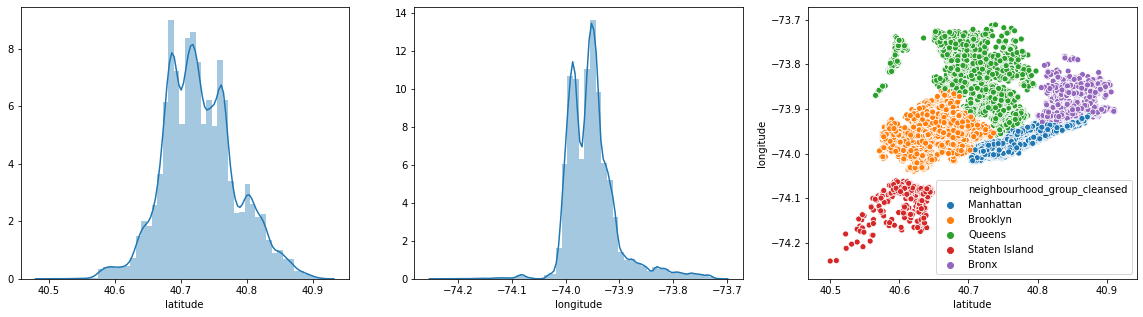

In [8]:
#visualization for latitude/longitude concentration areas
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.distplot(data['latitude'], ax=axes[0])
sns.distplot(data['longitude'], ax=axes[1])
sns.scatterplot(x= data['latitude'], y=data['longitude'], hue=data['neighbourhood_group_cleansed'])

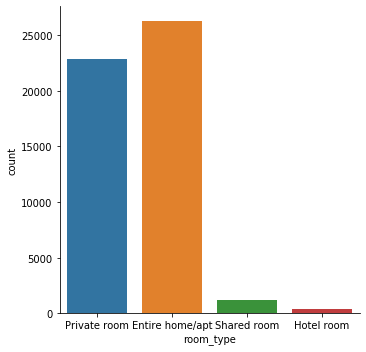

In [9]:
#visualization for type of room
sns.catplot(x='room_type', kind='count' ,data=data)
fig = plt.gcf()
fig.set_size_inches(5, 5)

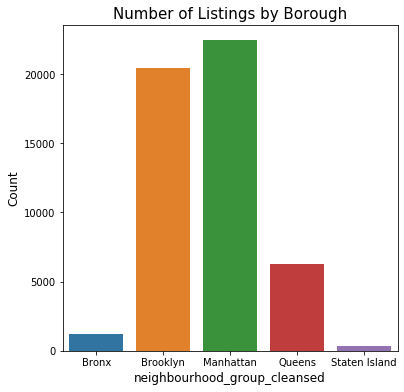

In [10]:
#Get a count by borough
borough_count = data.groupby('neighbourhood_group_cleansed').agg('count').reset_index()

#listings by borough
fig, ax1 = plt.subplots(1,1, figsize=(6,6)
                       )
sns.barplot(x='neighbourhood_group_cleansed', y='id', data=borough_count, ax=ax1)

ax1.set_title('Number of Listings by Borough', fontsize=15)
ax1.set_xlabel('neighbourhood_group_cleansed', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='both', labelsize=10)

In [11]:
#function to replace
def convert_bool(row):
    row = row.replace('f', '0')
    row = row.replace('t', '1')
    return row


#function to replace
def convert_string_to_int(row):
    row = row.replace('within an hour', '1')
    row = row.replace('within a few hours', '2')
    row = row.replace('within a day', '3')
    row = row.replace('a few days or more', '4')
    return row

In [12]:
# Extract the names of columns that are Numeric
numeric_data=data._get_numeric_data().columns

# Extract the names of columns that are Categorical
categorical_data=set(data.columns)-set(numeric_data) 

In [13]:
print (categorical_data)

{'require_guest_profile_picture', 'calendar_last_scraped', 'transit', 'picture_url', 'country_code', 'description', 'last_scraped', 'instant_bookable', 'host_since', 'extra_people', 'requires_license', 'host_has_profile_pic', 'host_is_superhost', 'country', 'is_location_exact', 'host_name', 'require_guest_phone_verification', 'space', 'name', 'cancellation_policy', 'room_type', 'amenities', 'listing_url', 'has_availability', 'is_business_travel_ready', 'host_picture_url', 'zipcode', 'house_rules', 'bed_type', 'experiences_offered', 'host_thumbnail_url', 'access', 'host_location', 'host_url', 'street', 'last_review', 'interaction', 'summary', 'host_response_rate', 'first_review', 'market', 'property_type', 'host_response_time', 'host_identity_verified', 'city', 'price', 'host_acceptance_rate', 'host_verifications', 'neighbourhood', 'state', 'host_about', 'neighbourhood_cleansed', 'calendar_updated', 'neighbourhood_group_cleansed', 'security_deposit', 'host_neighbourhood', 'smart_locatio

In [14]:
print (numeric_data)

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object')


In [40]:
def fix_currency(row):
    row = row.replace(',', '')
    row = row.replace('$', '')
    return row

In [33]:
filt = data['id'] == 16202962
data[['price', 'cleaning_fee']][filt].head()

,price,cleaning_fee
18057,120.0,$65.00


In [41]:
#fill with 0
Fill_with_zero = ['bathrooms', 'bedrooms', 'host_is_superhost', 'beds', 'review_scores_rating', 'review_scores_accuracy',
'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']

for column in Fill_with_zero:
    data[column] = data[column].replace(np.nan, '0')
    
#fill with $0.00
Fill_with_zero = ['security_deposit', 'cleaning_fee']

for column in Fill_with_zero:
    data[column] = data[column].replace(np.nan, '$0.00')

In [43]:
#trying out the test/train split for linear regression -- we will put 40% of the dataset as a test

from sklearn.model_selection import train_test_split

X = data[["reviews_per_month", "bathrooms", "bedrooms"]]
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [45]:
regressor.fit(X_train, y_train)

LinearRegression()

In [46]:
regressor.predict(X_test)

array([144.11714942, 147.40743041, 200.43535449, ..., 141.10527682,
       203.09288914, 147.6858388 ])

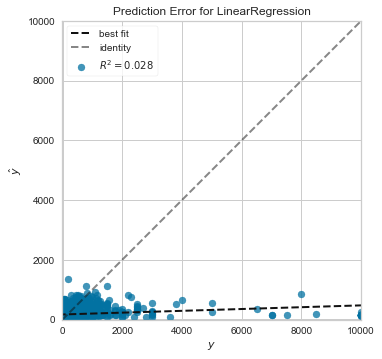

In [47]:
from yellowbrick.regressor import PredictionError
viz = PredictionError(LinearRegression())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

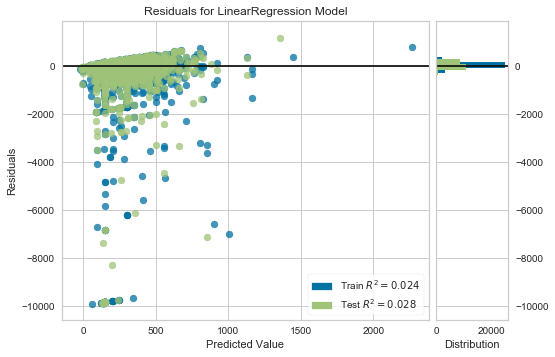

In [48]:
from yellowbrick.regressor import ResidualsPlot
viz = ResidualsPlot(LinearRegression())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

In [49]:
subway = pd.read_csv("NYC_Transit_Subway_Entrance_And_Exit_Data.csv") 
subway.head()

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,...,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.99822)"
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NW,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
3,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NE,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NW,40.654490,-74.004499,"(40.655144, -74.003549)","(40.65449, -74.004499)"


In [50]:
#to get a count of missing values for each column, and what percent of each column is null 
subway.isnull().sum()

total = subway.isnull().sum().sort_values(ascending=False)
percent = (subway.isnull().sum())/subway.isnull().count().sort_values(ascending=False)

missing_data_2 = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data_2.head(25)

,Total,Percent
Route11,1845,0.987687
Route10,1845,0.987687
Route9,1840,0.985011
Staff Hours,1828,0.978587
Route8,1820,0.974304
Exit Only,1812,0.970021
ADA Notes,1793,0.959850
Route7,1788,0.957173
Route6,1741,0.932013
Route5,1630,0.872591


In [57]:
#remove columns with less than 50%
def less_than_50_percent(colname):
    total_row = subway.shape[0]
    isnull_count = subway[colname].isna().sum()
    if isnull_count/total_row > .4:
        return True

In [58]:
columns = list(subway)
remove_columns_0 = []
for column in columns:
    remove_column_y_n = less_than_50_percent(column)
    if remove_column_y_n:
        remove_columns_0.append(column)

print(remove_columns_0)

['Route2']


In [59]:
subway.head(5)

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Entrance Type,Entry,Vending,Staffing,ADA,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,Stair,YES,YES,NONE,False,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.99822)"
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,Stair,YES,YES,FULL,False,False,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,Stair,YES,YES,FULL,False,True,4th Ave,36th St,NW,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
3,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,Stair,YES,YES,FULL,False,True,4th Ave,36th St,NE,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,Stair,YES,YES,FULL,False,True,4th Ave,36th St,NW,40.654490,-74.004499,"(40.655144, -74.003549)","(40.65449, -74.004499)"
